In [1]:
%load_ext sql


In [4]:
%sql sqlite:///C:/sqlite/chinook2.db

# 1) A Different Way of Combining Tables

In this lesson, we're going to learn how to combine data from different tables using set operators. We commonly use set operators to **stack multiple database tables into a single table**, or to filter results depending on what results in a table match those from another table. By the end of this lesson, you'll be able to do the following:

* Use the `UNION` operator to stack tables together

* Use the `INTERSECT` operator to produce a result only where rows match between two tables

* Use the `EXCEPT` operator to filter out the results of one table that match the results of another table

# 2) Joins vs. Set Operators

Joins allow us to combine data from different tables by joining columns horizontally and aligning rows based on conditions.

## JOINS

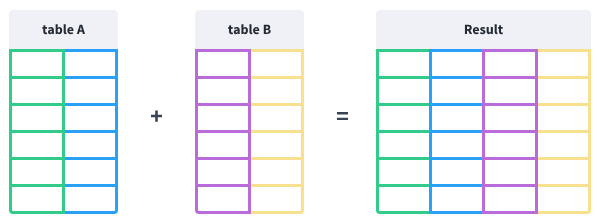

## SET OPERATORS

Set operators stack rows vertically and align columns.

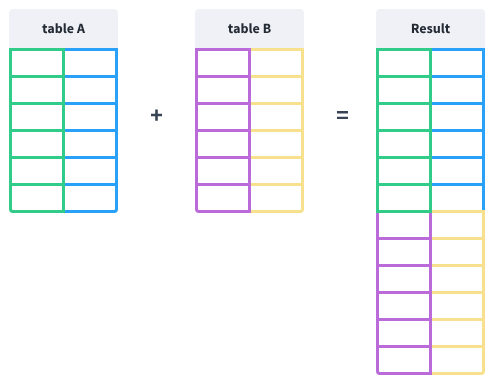

The name set operator comes from mathematics. You may be familiar with the union, intersection, and difference of sets in mathematics, often represented by Venn diagrams.

To teach these concepts, we modified the Chinook database to include four tables that stem from invoice:

* `invoice_2017q1_2018q2` which is made up of the rows of `invoice` whose date pertain to the period of the beginning of the first quarter of 2017 to the end of the second quarter of 2018

* `invoice_2018q1_2018q4` which is made up of the rows of `invoice` whose date pertain to the year 2018

* `invoice_2019q1_2019q4` which is made up of the rows of `invoice` whose date pertain to the year 2019

* `invoice_2020q1_2020q4` which is made up of the rows of `invoice` whose date pertain to the year 2020


# 3) UNION

we can use the UNION clause like this

```sql
SELECT *
  FROM table1

 UNION

SELECT *
  FROM table2;
```

Note that the result contains all the rows in both tables. We can represent this operation in a Venn diagram like this:

## Instructions

Recall the following:

* `invoice_2017q1_2018q2` is made up of the rows of `invoice` whose date pertain to the period starting from the beginning of first quarter of 2017 to the end of the second quarter of 2018

* `invoice_2018q1_2018q4` is made up of the rows of `invoice` whose date pertain to the year 2018

1. Write a query that returns all invoices pertaining to either 2017 or 2018.

In [7]:
%%sql
SELECT *
FROM invoice_2017q1_2018q2


UNION

SELECT *
FROM invoice_2018q1_2018q4
Limit 5

   sqlite:///C:/sqlite/chinook.db
 * sqlite:///C:/sqlite/chinook2.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84
2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.9
3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92
5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83


# 4) Compound Select Statements

This is a new type of syntax:

```sql
SELECT *
  FROM table1

 UNION

SELECT *
  FROM table2;
```
When we combine SELECT statements using a set operator we create a compound select statement.

The general syntax for combining two results looks like this:

```sql
SELECT statement

SET_OPERATOR

SELECT statement;
```

There are some very important constraints:

1. Each `SELECT` statement must meet these criteria:

    * Have the same number of columns
    
    * Align columns on the datatype (the first column of each statement must be the same datatype, the second column as well, and so on)

1. The `ORDER BY` and `LIMIT` clauses can only occur after the last `SELECT` clause. In other words, `SELECT` . . . `UNION` . . . `SELECT` run first, then `ORDER BY` and `LIMIT` execute.

## Examples
```sql
SELECT name, number
  FROM table1

 UNION

SELECT num, name
  FROM table2;
```

**is illegal** because name and num do not have the same datatype. Whereas this query . . .

```sql
SELECT *
  FROM table1
 ORDER BY name

 UNION 

SELECT *
  FROM table1;
```
**is illegal** not because we're repeating table1 — this is fine — but because we're using `ORDER BY` in the first `SELECT` statement while using a set operator.


# 5) UNION ALL

One important note about the `UNION` operator is that it will automatically remove any duplicate records among the two tables. If we want to keep all rows without removing duplicates, we can use the `UNION ALL` operator.

Recall tables table1 and table2:

| number | name    |
|--------|---------|
| 1      | Zito    |
| 2      | Miguel  |
| 3      | Arthur  |
| 4      | Therese |

---------------------------

| num| name      |
|-----|-----------|
| 3   | Arthur    |
| 4   | Therese   |
| 5   | Francisca |
| 6   | Bruno     |

If we wish to keep the repeated rows, we can use another set operator: UNION ALL.

Running the following . . .

```sql
SELECT *
  FROM table1

 UNION ALL

SELECT *
  FROM table2;
```
which yields to:

| number | name      |
|--------|-----------|
| 1      | Zito      |
| 2      | Miguel    |
| 3      | Arthur    |
| 4      | Therese   |
| 3      | Arthur    |
| 4      | Therese   |
| 5      | Francisca |
| 6      | Bruno     |

Note that even though the first column on `table2` is called `num`, the first column in the result is called `number`. This is because the first SELECT statement in a compound select statement determines the header.

## Instructions

Recall the following:

* `invoice_2017q1_2018q2` is made up of the rows of `invoice` whose date pertain to the period starting from the beginning of first quarter of 2017 to the end of the second quarter of 2018

* `invoice_2018q1_2018q4` is made up of the rows of `invoice` whose date pertain to the year 2018

1. Write a query that returns all invoices pertaining to either 2017 or 2018.

* Include repeated rows.

* Include only the columns `invoice_id`, `customer_id`, `invoice_date` and `total`.

In [8]:
%%sql
SELECT invoice_id, customer_id, invoice_date, total
  FROM invoice_2017q1_2018q2
  
UNION ALL

SELECT invoice_id, customer_id, invoice_date, total
  FROM invoice_2018q1_2018q4
Limit 5;

   sqlite:///C:/sqlite/chinook.db
 * sqlite:///C:/sqlite/chinook2.db
Done.


invoice_id,customer_id,invoice_date,total
1,18,2017-01-03 00:00:00,15.84
2,30,2017-01-03 00:00:00,9.9
3,40,2017-01-05 00:00:00,1.98
4,18,2017-01-06 00:00:00,7.92
5,27,2017-01-07 00:00:00,16.83


# 6) INTERSECT

The intersection between two sets is the elements that are in both sets. Diagramatically, for table1 and table2, we can represent this operation like this:

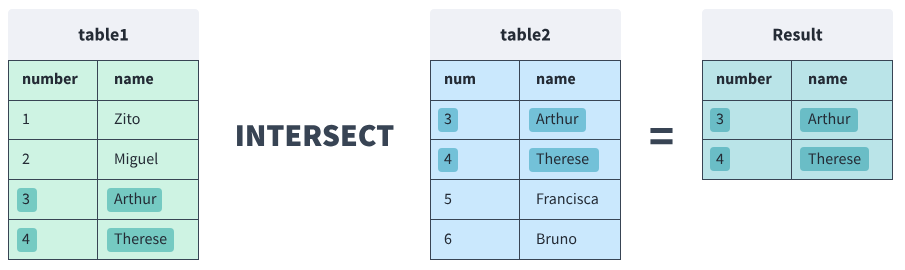

The syntax is the same as with UNION, but this time the clause is INTERSECT:

```sql
SELECT *
     FROM table1

INTERSECT

   SELECT *
     FROM table2;
```

Note that in order to follow the style guideline of creating a river in the middle of the clauses, we had to indent the `SELECT` statements.

## Instructions

Recall the following:

* `invoice_2017q1_2018q2` is made up of the rows of `invoice` whose date pertain to the period starting from the beginning of first quarter of 2017 to the end of the second quarter of 2018

* `invoice_2018q1_2018q4` is made up of the rows of `invoice` whose date pertain to the year 2018

1. Write a compound select statement that returns all invoices pertaining to the first half of 2018

In [9]:
%%sql
SELECT *
FROM invoice_2017q1_2018q2

INTERSECT

SELECT *
FROM invoice_2018q1_2018q4
Limit 5;

   sqlite:///C:/sqlite/chinook.db
 * sqlite:///C:/sqlite/chinook2.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
155,59,2018-01-02 00:00:00,"3,Raj Bhavan Road",Bangalore,None,India,560001,8.91
156,10,2018-01-03 00:00:00,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,10.89
157,57,2018-01-04 00:00:00,"Calle Lira, 198",Santiago,None,Chile,None,0.99
158,57,2018-01-07 00:00:00,"Calle Lira, 198",Santiago,None,Chile,None,5.9399999999999995
159,20,2018-01-08 00:00:00,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,5.9399999999999995


# EXCEPT

The last set operator we will learn is `EXCEPT`. This set operator represents the set difference between two sets — that is, the elements of the first set that **are not in the second set**. For example, we can represent "table1 except table2" like this:

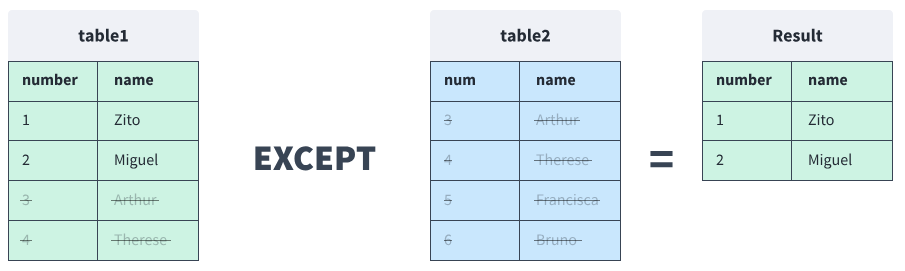

The syntax for this operator is similar to what we've seen throughout this lesson:

```sql
SELECT *
  FROM table1

EXCEPT

SELECT *
  FROM table2;
```

## Instructions

Recall the following:

* `invoice_2017q1_2018q2` is made up of the rows of `invoice` whose date pertain to the period starting from the beginning of first quarter of 2017 to the end of the second quarter of 2018

* `invoice_2018q1_2018q4` is made up of the rows of `invoice` whose date pertain to the year 2018

1. Write a compound select statement that returns all invoices pertaining to the year `2017` ordered from the most recent invoice to the oldest.

In [10]:
%%sql
SELECT *
FROM invoice_2017q1_2018q2

EXCEPT
SELECT *
FROM invoice_2018q1_2018q4
ORDER BY invoice_date DESC

limit 5;


   sqlite:///C:/sqlite/chinook.db
 * sqlite:///C:/sqlite/chinook2.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
154,39,2017-12-17 00:00:00,"4, Rue Milton",Paris,None,France,75009,2.9699999999999998
153,1,2017-12-14 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,13.86
152,12,2017-12-12 00:00:00,"Praça Pio X, 119",Rio de Janeiro,RJ,Brazil,20040-020,5.9399999999999995
151,35,2017-12-06 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,2.9699999999999998
150,22,2017-12-01 00:00:00,120 S Orange Ave,Orlando,FL,USA,32801,2.9699999999999998


# 8) Set Operators Use Cases

From a logic point of view, the set operators `UNION ALL` and `INTERSECT` are equivalent to `OR` and `AND`, respectively. 

* We can use `UNION ALL` to mimic `OR`,

* We can use `INTERSECT` to mimic `AND`. 

For example, the following query . . .

```sql
SELECT *
  FROM some_table
 WHERE condition1 OR condition2;
```

. . . is equivalent to . . .

```sql
SELECT *
  FROM some_table
 WHERE condition1

 UNION ALL

SELECT *
  FROM some_table
 WHERE condition2;
```

Note that we use `UNION ALL` instead of `UNION` because `UNION` removes duplicates that may be in the original `SELECT` statement, whereas both `UNION ALL` and `OR` won't.

As for `AND` and `INTERSECT`, they work similarly to how `UNION ALL` mimics `OR`, but we don't have the same constraint with duplicate records as we do when using `UNION ALL` to mimic `OR`.

Rewriting `OR` as a **compound select statement** can sometimes be beneficial performance-wise. That is, `UNION ALL` may return the same result faster than `OR`. It's a good trick to have, especially when you're dealing with large amounts of data.